<a href="https://colab.research.google.com/github/DineshDevPandey/Pytorch_basics/blob/master/8_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
import torch.nn as nn

## Generate dataset

In [0]:
def generate_dataset(n_pts):

  # how many cluster you want(number of classes are there)
  centers = [[-0.5, 0.5],[0.5, -0.5]]
  X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)
  plt.scatter(X[y==0, 0], X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])
  x_data = torch.Tensor(X)
  y_data = torch.Tensor(y.reshape(100, 1))
  return (x_data, y_data, X, y)


## Linear model class

In [0]:
class Model(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
    
  def forward(self, x):
    pred = torch.sigmoid(self.linear(x))
    return pred

  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
        return 1
    else:
        return 0
        
        

Equetion of line : x1*w1 + x2*w2 = b <br>we have got w1 = 0.1622, w2 = -0.1683 and b = 0.1939 <br>These are random weights before training


## Get models parameters


In [0]:
def get_param(model):
  [w, b] = model.parameters()
  # take weights in separate variable
  w1, w2 = w.view(2)
  return(w1.item(), w2.item(), b[0].item())

## draw scatter plot

In [0]:
def scatter_plot(X, y):
  plt.scatter(X[y==0, 0], X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])

## draw decision line and scatter plot

In [0]:
def plot_fit(model, title, X, y):
  plt.title = title
  w1, w2, b1 = get_param(model)
  x1 = np.array([-2, 2])
  x2 = (w1*x1 + b1)/(-w2)
  plt.plot(x1, x2, 'r')
  scatter_plot(X, y)
  plt.show()


## Create model

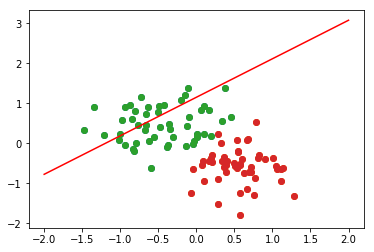

In [77]:
torch.manual_seed(2)
x_data, y_data, X, y = generate_dataset(n_pts=100)
model = Model(2, 1)
plot_fit(model, 'Initial model', X, y)

## Defining loss and optimizer function

In [0]:
# binary cross entropy loss
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

## NN training

In [79]:
epochs = 10000
losses = []
for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    print('epoch: ', i, 'loss ', loss.item())

    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  0 loss  0.6185115575790405
epoch:  1 loss  0.6174639463424683
epoch:  2 loss  0.6164201498031616
epoch:  3 loss  0.6153794527053833
epoch:  4 loss  0.614342451095581
epoch:  5 loss  0.6133086681365967
epoch:  6 loss  0.6122783422470093
epoch:  7 loss  0.6112515330314636
epoch:  8 loss  0.6102280616760254
epoch:  9 loss  0.6092080473899841
epoch:  10 loss  0.6081910729408264
epoch:  11 loss  0.6071775555610657
epoch:  12 loss  0.606167733669281
epoch:  13 loss  0.6051608920097351
epoch:  14 loss  0.604157567024231
epoch:  15 loss  0.6031574606895447
epoch:  16 loss  0.602160632610321
epoch:  17 loss  0.6011670827865601
epoch:  18 loss  0.6001767516136169
epoch:  19 loss  0.599189817905426
epoch:  20 loss  0.5982059240341187
epoch:  21 loss  0.5972254276275635
epoch:  22 loss  0.5962479114532471
epoch:  23 loss  0.5952739119529724
epoch:  24 loss  0.5943028926849365
epoch:  25 loss  0.5933352112770081
epoch:  26 loss  0.5923705101013184
epoch:  27 loss  0.5914090275764465
epoch: 

## Loss plot

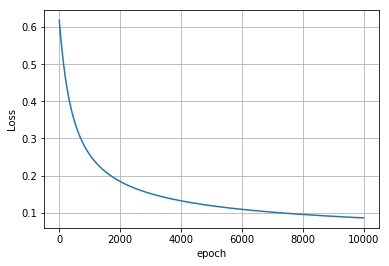

In [80]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.grid()

## Final descision plane

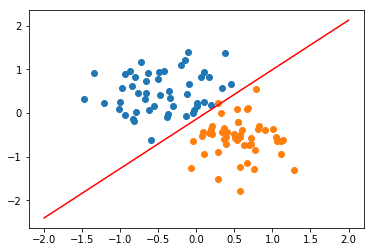

In [81]:
plot_fit(model, "Trained Model", X, y)

## Testing

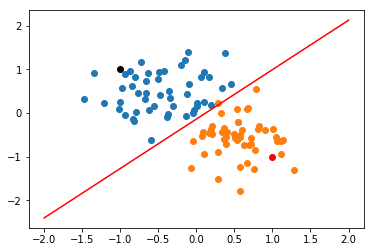

Red point positive probability = 0.999263346195221
Black point positive probability = 0.0002667742664925754
Red point belongs in class 1
Black point belongs in class = 0


In [82]:
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')
plot_fit(model, "Trained Model", X, y)
print("Red point positive probability = {}".format(model.forward(point1).item())) 
print("Black point positive probability = {}".format(model.forward(point2).item())) 
print("Red point belongs in class {}".format(model.predict(point1))) 
print("Black point belongs in class = {}".format(model.predict(point2)))